In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [2]:
tempraw=pd.read_csv("dataTemp.csv",header=None,sep=";",index_col=0);
windraw=pd.read_csv("dataWind.csv",header=None,sep=";",index_col=0);
gps=pd.read_csv("dataGPS.csv",header=None,sep=";",index_col=0);
temp=tempraw.to_numpy();
wind=windraw.to_numpy();
gps

,1,2
0,,
TEMP3426,2.5,51.0
TEMP3510,2.0,50.5
TEMP3511,2.5,50.5
TEMP3512,3.0,50.5
TEMP3513,3.5,50.5
...,...,...
TEMP4786,2.5,43.0
TEMP4787,3.0,43.0
TEMP4870,2.0,42.5


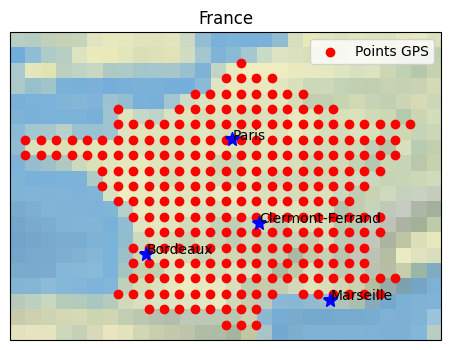

In [3]:
projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1, 2, 1, projection=projection)
ax.set_extent([-5, 9, 42, 52])
ax.set_title("France")
ax.stock_img();
ax.plot(2.217999, 48.512381, 'b*', markersize=10); ax.text(2.217999, 48.512381, "Paris");
ax.plot(-0.57, 44.8, 'b*', markersize=10); ax.text(-0.57, 44.8, "Bordeaux");
ax.plot(3.1, 45.8, 'b*', markersize=10); ax.text(3.1, 45.8, "Clermont-Ferrand");
ax.plot(5.4, 43.3, 'b*', markersize=10); ax.text(5.4, 43.3, "Marseille");
ax.scatter(gps.iloc[:, 0], gps.iloc[:, 1], color='red', label='Points GPS')
ax.legend()
plt.show();

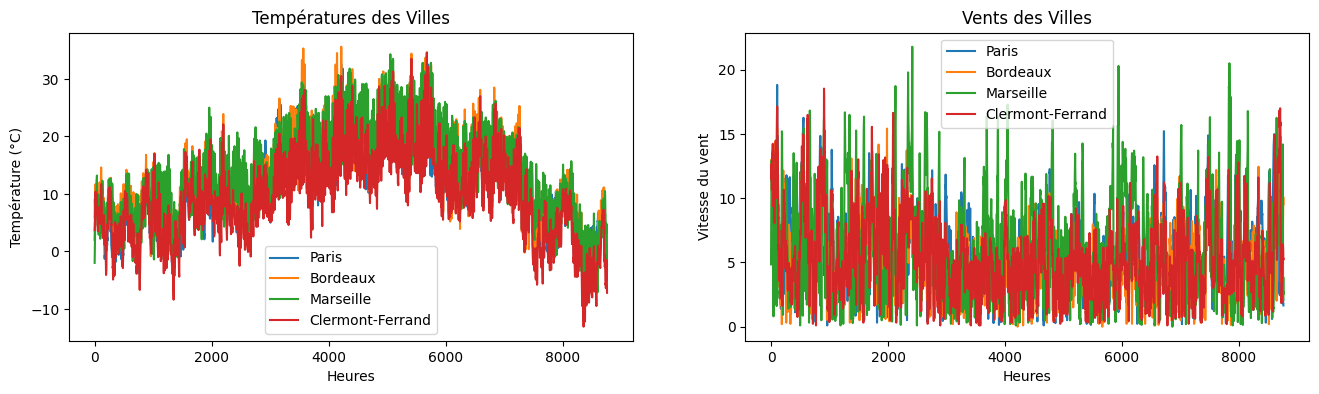

In [4]:
# Supposons que vous ayez des indices pour Marseille, Bordeaux et Clermont-Ferrand
indices = [33, 182, 244, 156]  # Remplacez ceci par les indices appropriés
villes = ["Paris", "Bordeaux", "Marseille", "Clermont-Ferrand"]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

index = 0
# Plot des températures
for idx in indices:
    ax1.plot(range(len(temp[idx, :])), temp[idx, :], label=f'{villes[index]}')
    index += 1

ax1.set_title('Températures des Villes')
ax1.set_xlabel('Heures')
ax1.set_ylabel('Température (°C)')
ax1.legend()

index = 0
# Plot des vents (à ajuster selon vos besoins)
for idx in indices:
    ax2.plot(range(len(wind[idx, :])), wind[idx, :], label=f'{villes[index]}')
    index += 1

ax2.set_title('Vents des Villes')
ax2.set_xlabel('Heures')
ax2.set_ylabel('Vitesse du vent')
ax2.legend()

plt.show()

In [5]:
# Bordeaux :
# Latitude : 44.8
# Longitude : -0.57

# Marseille :
# Latitude : 43.3
# Longitude : 5.4

# Clermont-Ferrand :
# Latitude : 45.8
# Longitude : 3.1

def find_closest_point(dataset, longitude, latitude):
    dataset_array = np.array(dataset)
    distances = (dataset_array[:, 0] - longitude)**2 + (dataset_array[:, 1] - latitude)**2
    return np.argmin(distances)

find_closest_point(gps, 3.1, 45.8)

# indice le plus proche de Bordeaux : 182 = TEMP4439
# indice le plus proche de Marseille : 244 = TEMP4707
# indice le plus proche de Clermont-Ferrand : 156 = TEMP4277

156

In [6]:
# Compute average temperature at each grid point
avg_temp = np.mean(temp, axis=1)

# Compute average wind at each grid point
avg_wind = np.mean(wind, axis=1)

# Combine the results into a new NumPy array
avg_data = np.column_stack((avg_temp, avg_wind))

avg_temp

array([10.80037671,  9.92563927, 10.00908676, 10.56394977, 10.60884703,
       11.6456621 , 10.26665525, 10.1053653 , 10.03192922, 10.10409817,
       10.05125571,  9.58827626,  9.31535388, 11.07243151, 10.17956621,
       10.41740868,  9.99012557, 10.22021689, 10.54865297, 10.58913242,
       10.3861758 , 10.21277397, 10.04311644,  9.51942922,  9.6760274 ,
       11.21631279, 10.04616438, 10.17061644, 10.65896119,  9.94627854,
       10.38673516, 10.68015982, 10.91640411, 11.21323059, 10.70060502,
       10.09553653, 10.14905251, 10.26456621,  9.8858105 ,  9.6858105 ,
       10.34889269, 10.08907534, 10.11711187,  9.71068493, 10.55619863,
       11.4697032 , 10.81304795, 10.41539954, 10.63280822, 11.30414384,
       11.24802511, 11.20624429, 10.37234018, 10.21093607, 10.18028539,
       10.63326484, 10.31351598, 10.84533105, 10.78323059, 11.32732877,
       11.11732877, 10.8522032 , 10.90413242, 10.56960046, 10.40681507,
        9.24541096,  9.18868721, 10.36388128,  9.48094749,  9.93

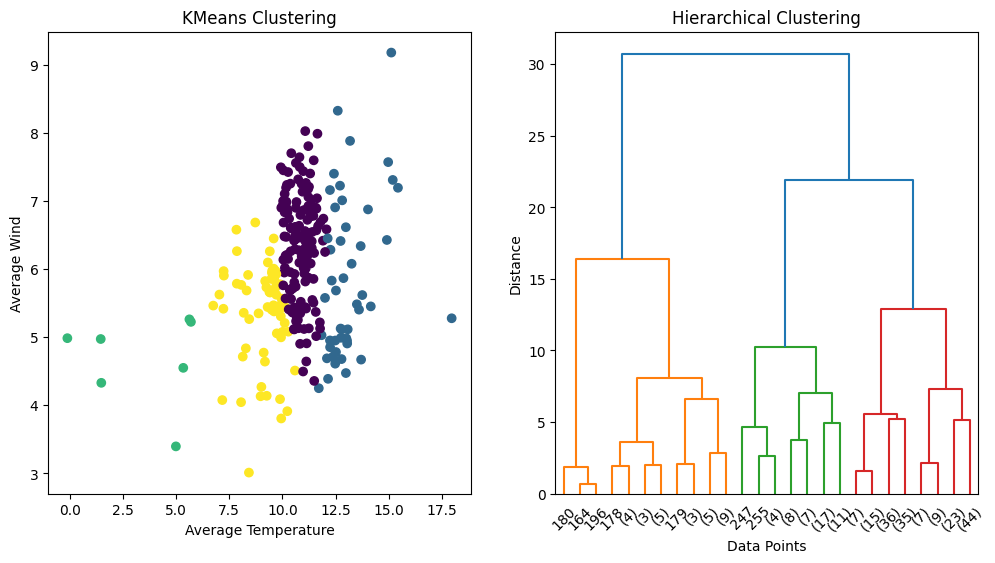

In [7]:
# KMeans clustering
kmeans0 = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels0 = kmeans0.fit_predict(avg_data)

# Hierarchical clustering
linkage_matrix0 = linkage(avg_data, method='ward')
hierarchical_labels0 = AgglomerativeClustering(n_clusters=4, linkage='ward').fit_predict(avg_data)

# Plot the results
plt.figure(figsize=(12, 6))

# KMeans clustering
plt.subplot(1, 2, 1)
plt.scatter(avg_data[:, 0], avg_data[:, 1], c=kmeans_labels0, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Average Temperature')
plt.ylabel('Average Wind')

# Hierarchical clustering
plt.subplot(1, 2, 2)
dendrogram(linkage_matrix0, truncate_mode='level', p=4)
plt.title('Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')

plt.show()

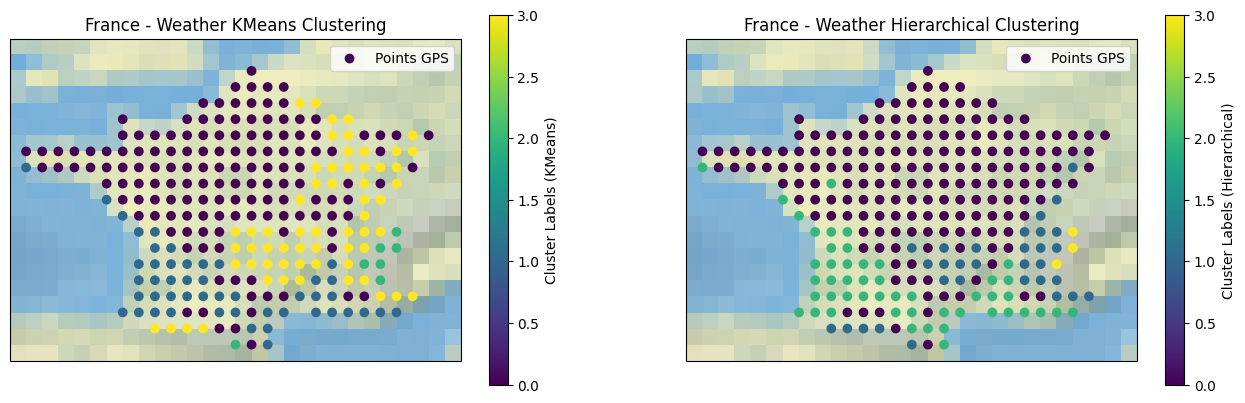

In [8]:
projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(16, 8))

# Plot for KMeans clustering
ax1 = fig.add_subplot(1, 2, 1, projection=projection)
ax1.set_extent([-5, 9, 42, 52])
ax1.set_title("France - Weather KMeans Clustering")
ax1.stock_img()
scatter1 = ax1.scatter(gps.iloc[:, 0], gps.iloc[:, 1], c=kmeans_labels0, cmap='viridis', label='Points GPS')
ax1.legend()
cbar1 = plt.colorbar(scatter1, ax=ax1, shrink=0.6)
cbar1.set_label('Cluster Labels (KMeans)')

# Plot for Hierarchical clustering
ax2 = fig.add_subplot(1, 2, 2, projection=projection)
ax2.set_extent([-5, 9, 42, 52])
ax2.set_title("France - Weather Hierarchical Clustering")
ax2.stock_img()
scatter2 = ax2.scatter(gps.iloc[:, 0], gps.iloc[:, 1], c=hierarchical_labels0, cmap='viridis', label='Points GPS')
ax2.legend()
cbar2 = plt.colorbar(scatter2, ax=ax2, shrink=0.6)
cbar2.set_label('Cluster Labels (Hierarchical)')

plt.show()

Inertia: 8183045.360801062
Davies-Bouldin Index: 1.6790461671012644


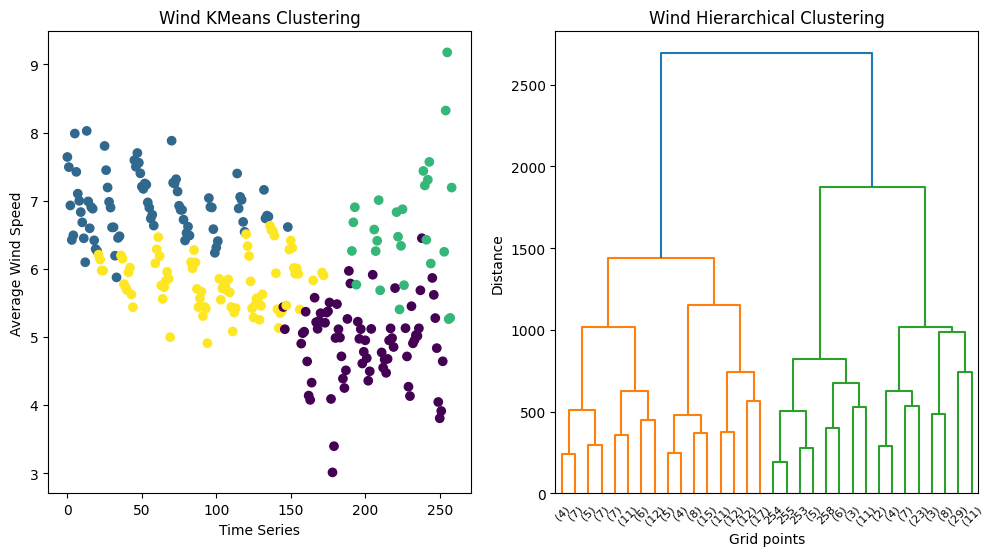

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 3
 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1
 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3
 3 3 3 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 3 3 3 3 3 3 3 3 3 0 0 3
 1 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 3 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 2
 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3
 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 2 2 2 2 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 2
 2 2 2 2 2 3 3 3 3 3 3 3

In [9]:
# KMeans clustering
kmeans1 = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels1 = kmeans1.fit_predict(wind)

# Hierarchical clustering
linkage_matrix1 = linkage(wind, method='ward')
hierarchical_labels1 = AgglomerativeClustering(n_clusters=4, linkage='ward').fit_predict(wind)

# Inertia
inertia1 = kmeans1.inertia_
print(f"Inertia: {inertia1}")

# Davies-Bouldin Index
db_index1 = davies_bouldin_score(wind, hierarchical_labels1)
print(f"Davies-Bouldin Index: {db_index1}")

# Plot the results
plt.figure(figsize=(12, 6))

# KMeans clustering
plt.subplot(1, 2, 1)
plt.scatter(range(wind.shape[0]), wind.mean(axis=1), c=kmeans_labels1, cmap='viridis')
plt.title('Wind KMeans Clustering')
plt.xlabel('Time Series')
plt.ylabel('Average Wind Speed')

# Hierarchical clustering
plt.subplot(1, 2, 2)
dendrogram(linkage_matrix1, truncate_mode='level', p=4)
plt.title('Wind Hierarchical Clustering')
plt.xlabel('Grid points')
plt.ylabel('Distance')

plt.show()
print(kmeans_labels1)
print(hierarchical_labels1)

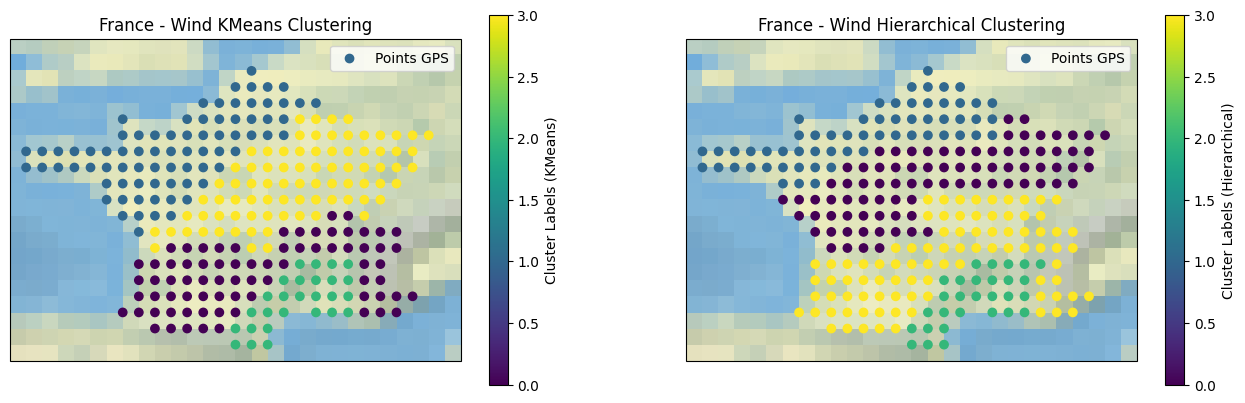

In [10]:
projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(16, 8))

# Plot for KMeans clustering
ax1 = fig.add_subplot(1, 2, 1, projection=projection)
ax1.set_extent([-5, 9, 42, 52])
ax1.set_title("France - Wind KMeans Clustering")
ax1.stock_img()
scatter1 = ax1.scatter(gps.iloc[:, 0], gps.iloc[:, 1], c=kmeans_labels1, cmap='viridis', label='Points GPS')
ax1.legend()
cbar1 = plt.colorbar(scatter1, ax=ax1, shrink=0.6)
cbar1.set_label('Cluster Labels (KMeans)')

# Plot for Hierarchical clustering
ax2 = fig.add_subplot(1, 2, 2, projection=projection)
ax2.set_extent([-5, 9, 42, 52])
ax2.set_title("France - Wind Hierarchical Clustering")
ax2.stock_img()
scatter2 = ax2.scatter(gps.iloc[:, 0], gps.iloc[:, 1], c=hierarchical_labels1, cmap='viridis', label='Points GPS')
ax2.legend()
cbar2 = plt.colorbar(scatter2, ax=ax2, shrink=0.6)
cbar2.set_label('Cluster Labels (Hierarchical)')

plt.show()

In [11]:
# Standardize the wind data (mean=0, variance=1)
wind_standardized = StandardScaler().fit_transform(wind)

# Apply Functional PCA
pca0 = PCA()
pca0.fit(wind_standardized)

# Variance explained by each principal component
explained_variance_ratio = pca0.explained_variance_ratio_

# Cumulative variance explained
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Determine the number of components to keep
threshold = 0.95  # Threshold for cumulative variance explained
num_components_to_keep = np.argmax(cumulative_variance_ratio >= threshold) + 1

# Reduce dimensionality using the selected number of components
wind_pca0 = (pca0.transform(wind_standardized))[:, :num_components_to_keep]

# Display the results
print(len(wind_pca0[0]))
print(f"Number of components to keep: {num_components_to_keep}")

47
Number of components to keep: 47


Inertia: 846061.628181629
Davies-Bouldin Index: 1.6237458985696915


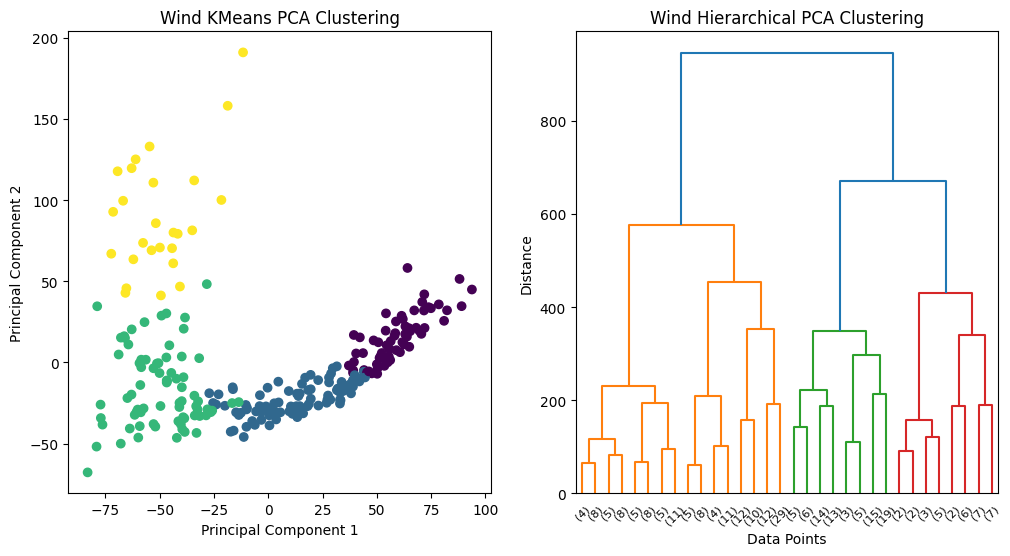

In [12]:
# Apply PCA with 10 principal components
pca1 = PCA(n_components=10)
wind_pca1 = pca1.fit_transform(wind_standardized)

# KMeans PCA clustering
kmeans2 = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels2 = kmeans2.fit_predict(wind_pca1)

# Hierarchical PCA clustering
linkage_matrix2 = linkage(wind_pca1, method='ward')
hierarchical_labels2 = AgglomerativeClustering(n_clusters=4, linkage='ward').fit_predict(wind_pca1)

# Inertia
inertia2 = kmeans2.inertia_
print(f"Inertia: {inertia2}")

db_index2 = davies_bouldin_score(wind, hierarchical_labels2)
print(f"Davies-Bouldin Index: {db_index2}")

# Plot the results
plt.figure(figsize=(12, 6))

# KMeans PCA clustering
plt.subplot(1, 2, 1)
plt.scatter(wind_pca1[:, 0], wind_pca1[:, 1], c=kmeans_labels2, cmap='viridis')
plt.title('Wind KMeans PCA Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Hierarchical PCA clustering
plt.subplot(1, 2, 2)
dendrogram(linkage_matrix2, truncate_mode='level', p=4)
plt.title('Wind Hierarchical PCA Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')

plt.show()

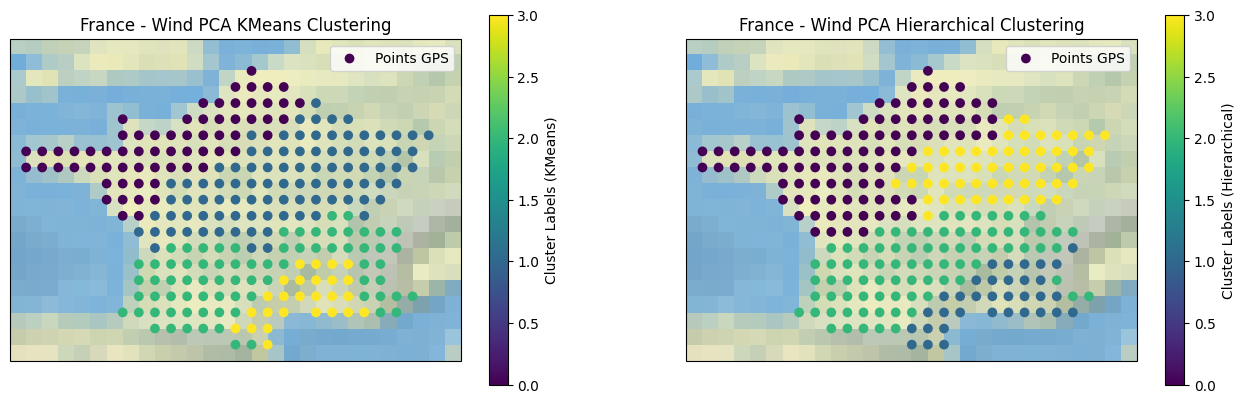

In [13]:
projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(16, 8))

# Plot for KMeans PCA clustering
ax1 = fig.add_subplot(1, 2, 1, projection=projection)
ax1.set_extent([-5, 9, 42, 52])
ax1.set_title("France - Wind PCA KMeans Clustering")
ax1.stock_img()
scatter1 = ax1.scatter(gps.iloc[:, 0], gps.iloc[:, 1], c=kmeans_labels2, cmap='viridis', label='Points GPS')
ax1.legend()
cbar1 = plt.colorbar(scatter1, ax=ax1, shrink=0.6)
cbar1.set_label('Cluster Labels (KMeans)')

# Plot for Hierarchical PCA clustering
ax2 = fig.add_subplot(1, 2, 2, projection=projection)
ax2.set_extent([-5, 9, 42, 52])
ax2.set_title("France - Wind PCA Hierarchical Clustering")
ax2.stock_img()
scatter2 = ax2.scatter(gps.iloc[:, 0], gps.iloc[:, 1], c=hierarchical_labels2, cmap='viridis', label='Points GPS')
ax2.legend()
cbar2 = plt.colorbar(scatter2, ax=ax2, shrink=0.6)
cbar2.set_label('Cluster Labels (Hierarchical)')

plt.show()

Inertia: 8093997.268125119
Davies-Bouldin Index: 3.085335493824959


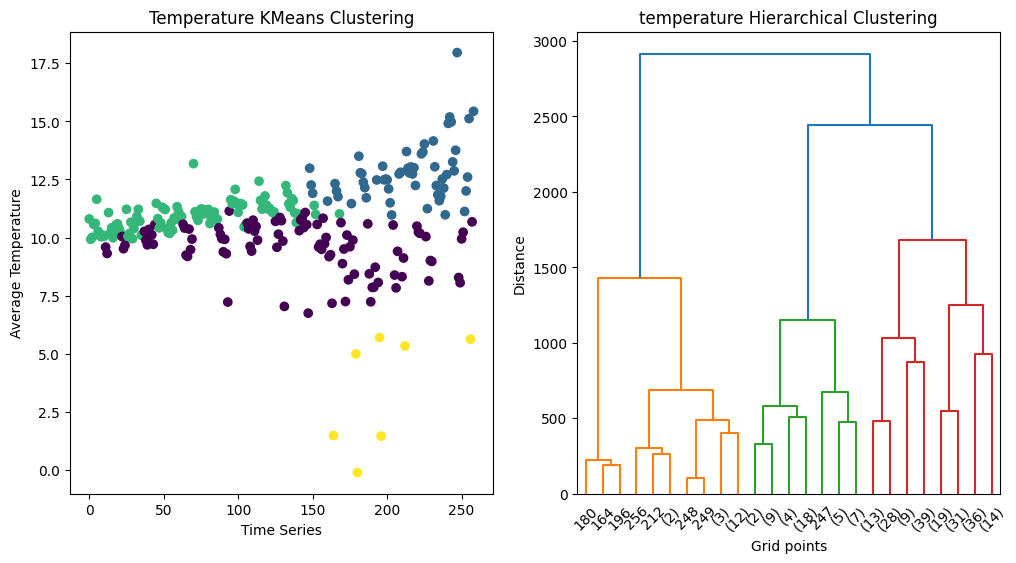

[2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2
 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0
 1 1 1 2 2 0 0 0 0 0 0 0 1 0 0 0 3 1 1 1 2 0 0 0 0 0 0 0 1 0 0 3 3 1 1 1 1
 1 1 0 0 0 0 0 0 1 0 3 3 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 3 1 1 1 1 1 1 1 0 0
 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 3 0 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 0 3 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3
 3 3 3 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 0 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 0
 1 1 1 3 3 3 3 3 3 3 3 3 2 3 3 0 0 1 1 1 3 3 3 3 0 3 0 3 2 3 0 0 0 2 2 2 2
 2 2 3 0 0 0 0 0 2 0 0 0 2 2 2 2 2 2 3 3 0 0 3 2 2 3 3 0 2 2 2 2 2 2 2 3 3
 3 2 2 2 3 3 3 3 3 2 2 2

In [14]:
# KMeans clustering
kmeans3 = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels3 = kmeans3.fit_predict(temp)

# Hierarchical clustering
linkage_matrix3 = linkage(temp, method='ward')
hierarchical_labels3 = AgglomerativeClustering(n_clusters=4, linkage='ward').fit_predict(temp)

# Inertia
inertia3 = kmeans3.inertia_
print(f"Inertia: {inertia3}")

# Davies-Bouldin Index
db_index3 = davies_bouldin_score(wind, hierarchical_labels3)
print(f"Davies-Bouldin Index: {db_index3}")

# Plot the results
plt.figure(figsize=(12, 6))

# KMeans clustering
plt.subplot(1, 2, 1)
plt.scatter(range(temp.shape[0]), temp.mean(axis=1), c=kmeans_labels3, cmap='viridis')
plt.title('Temperature KMeans Clustering')
plt.xlabel('Time Series')
plt.ylabel('Average Temperature')

# Hierarchical clustering
plt.subplot(1, 2, 2)
dendrogram(linkage_matrix3, truncate_mode='level', p=4)
plt.title('temperature Hierarchical Clustering')
plt.xlabel('Grid points')
plt.ylabel('Distance')

plt.show()
print(kmeans_labels3)
print(hierarchical_labels3)

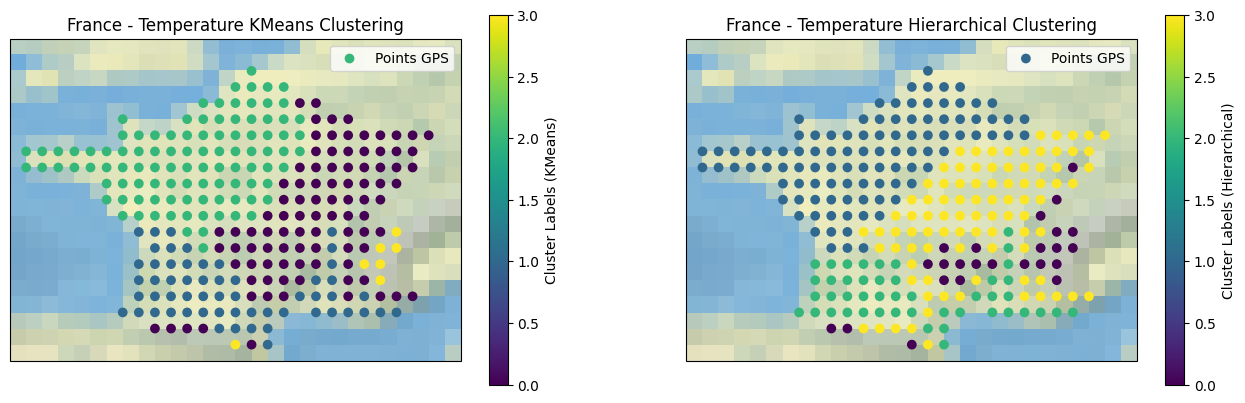

In [15]:
projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(16, 8))

# Plot for KMeans clustering
ax1 = fig.add_subplot(1, 2, 1, projection=projection)
ax1.set_extent([-5, 9, 42, 52])
ax1.set_title("France - Temperature KMeans Clustering")
ax1.stock_img()
scatter1 = ax1.scatter(gps.iloc[:, 0], gps.iloc[:, 1], c=kmeans_labels3, cmap='viridis', label='Points GPS')
ax1.legend()
cbar1 = plt.colorbar(scatter1, ax=ax1, shrink=0.6)
cbar1.set_label('Cluster Labels (KMeans)')

# Plot for Hierarchical clustering
ax2 = fig.add_subplot(1, 2, 2, projection=projection)
ax2.set_extent([-5, 9, 42, 52])
ax2.set_title("France - Temperature Hierarchical Clustering")
ax2.stock_img()
scatter2 = ax2.scatter(gps.iloc[:, 0], gps.iloc[:, 1], c=hierarchical_labels3, cmap='viridis', label='Points GPS')
ax2.legend()
cbar2 = plt.colorbar(scatter2, ax=ax2, shrink=0.6)
cbar2.set_label('Cluster Labels (Hierarchical)')

plt.show()

In [16]:
# Standardize the wind data (mean=0, variance=1)
temp_standardized = StandardScaler().fit_transform(temp)

# Apply Functional PCA
pca2 = PCA()
pca2.fit(temp_standardized)

# Variance explained by each principal component
explained_variance_ratio = pca2.explained_variance_ratio_

# Cumulative variance explained
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Determine the number of components to keep
threshold = 0.95  # Threshold for cumulative variance explained
num_components_to_keep = np.argmax(cumulative_variance_ratio >= threshold) + 1

# Reduce dimensionality using the selected number of components
temp_pca0 = (pca2.transform(temp_standardized))[:, :num_components_to_keep]

# Display the results
print(len(temp_pca0[0]))
print(f"Number of components to keep: {num_components_to_keep}")

22
Number of components to keep: 22


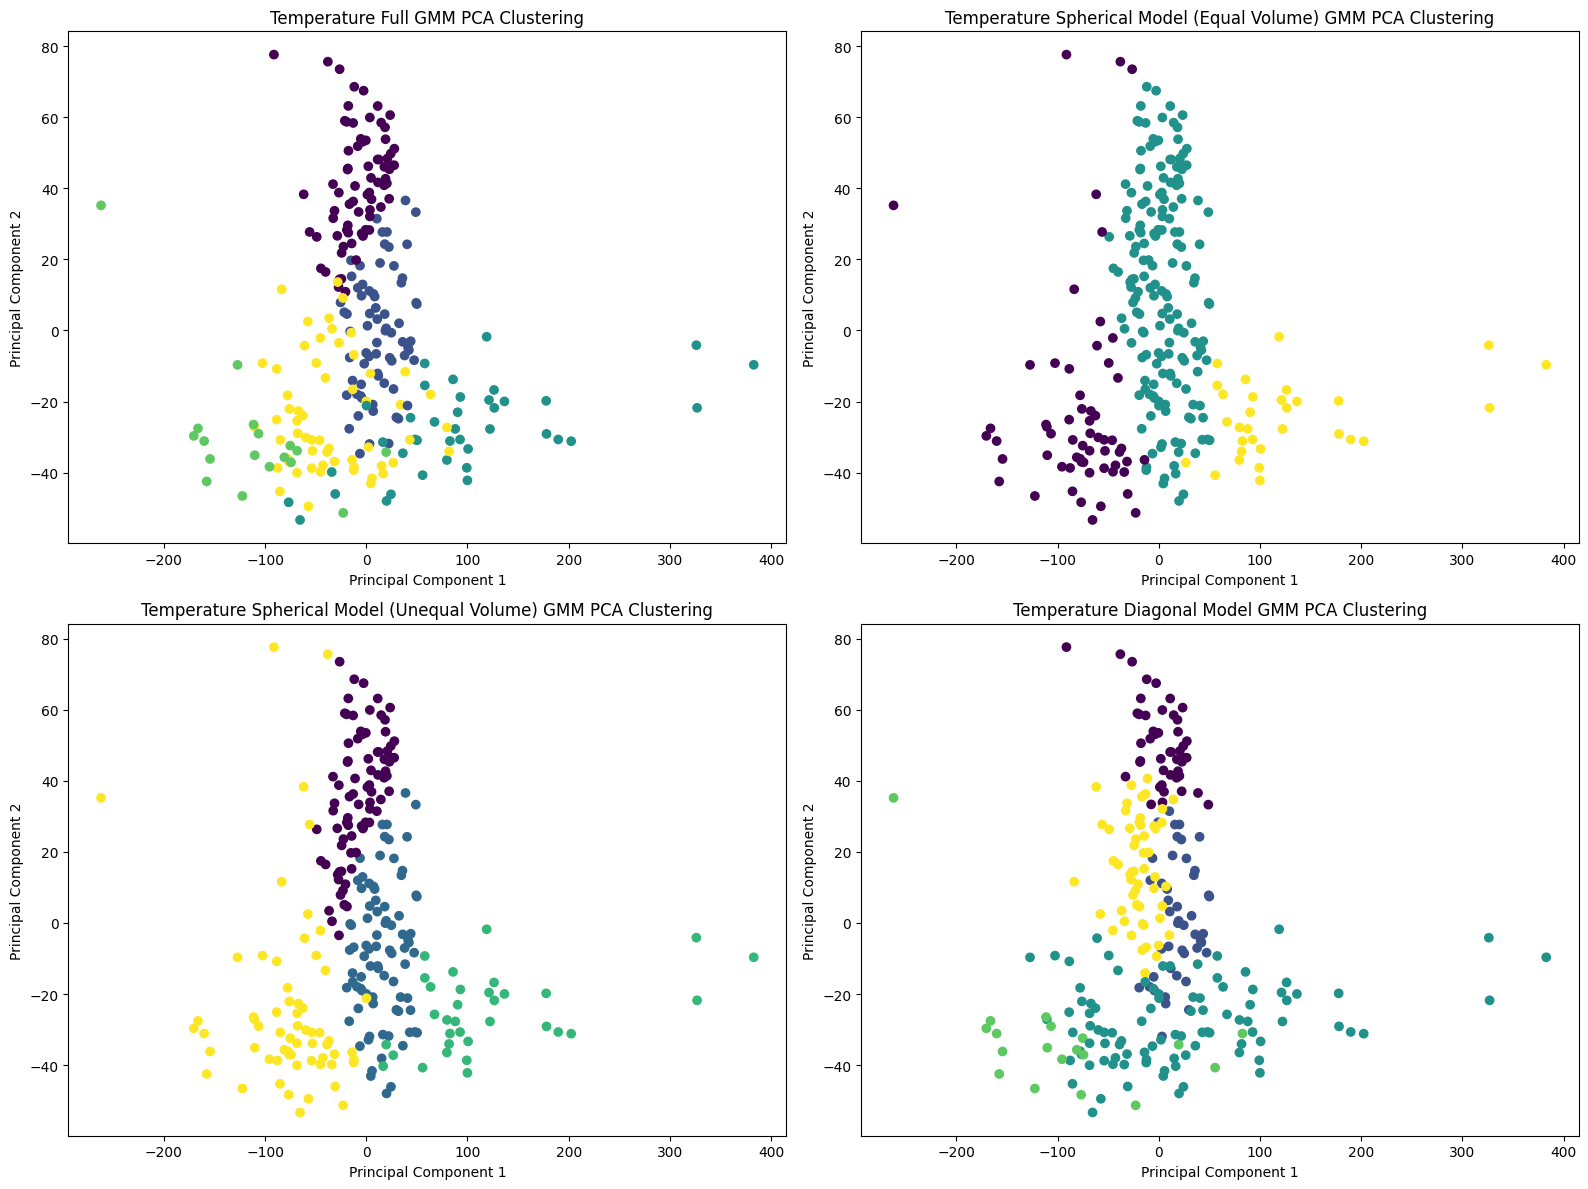

Full GMM AIC: 18258.58527237891
Full GMM BIC: 19428.78170467806


In [32]:
# Apply PCA with 10 principal components
pca3 = PCA(n_components=10)
temp_pca1 = pca3.fit_transform(temp_standardized)

# GMM PCA clustering for different covariance types
gmm = GaussianMixture(n_components=5, random_state=42) # default : covariance_type='full'
gmm_spherical_equal = GaussianMixture(n_components=3, covariance_type='spherical', random_state=42)
gmm_spherical_unequal = GaussianMixture(n_components=4, covariance_type='spherical', random_state=42)
gmm_diagonal = GaussianMixture(n_components=5, covariance_type='diag', random_state=42)

gmm_labels = gmm.fit_predict(temp_pca1)
gmm_labels_spherical_equal = gmm_spherical_equal.fit_predict(temp_pca1)
gmm_labels_spherical_unequal = gmm_spherical_unequal.fit_predict(temp_pca1)
gmm_labels_diagonal = gmm_diagonal.fit_predict(temp_pca1)

# Plot the results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot for the original GMM PCA clustering
axes[0, 0].scatter(temp_pca1[:, 0], temp_pca1[:, 1], c=gmm_labels, cmap='viridis')
axes[0, 0].set_title('Temperature Full GMM PCA Clustering')
axes[0, 0].set_xlabel('Principal Component 1')
axes[0, 0].set_ylabel('Principal Component 2')

# Plot for the spherical model with equal volume
axes[0, 1].scatter(temp_pca1[:, 0], temp_pca1[:, 1], c=gmm_labels_spherical_equal, cmap='viridis')
axes[0, 1].set_title('Temperature Spherical Model (Equal Volume) GMM PCA Clustering')
axes[0, 1].set_xlabel('Principal Component 1')
axes[0, 1].set_ylabel('Principal Component 2')

# Plot for the spherical model with unequal volume
axes[1, 0].scatter(temp_pca1[:, 0], temp_pca1[:, 1], c=gmm_labels_spherical_unequal, cmap='viridis')
axes[1, 0].set_title('Temperature Spherical Model (Unequal Volume) GMM PCA Clustering')
axes[1, 0].set_xlabel('Principal Component 1')
axes[1, 0].set_ylabel('Principal Component 2')

# Plot for the diagonal, varying volume, and shape
axes[1, 1].scatter(temp_pca1[:, 0], temp_pca1[:, 1], c=gmm_labels_diagonal, cmap='viridis')
axes[1, 1].set_title('Temperature Diagonal Model GMM PCA Clustering')
axes[1, 1].set_xlabel('Principal Component 1')
axes[1, 1].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

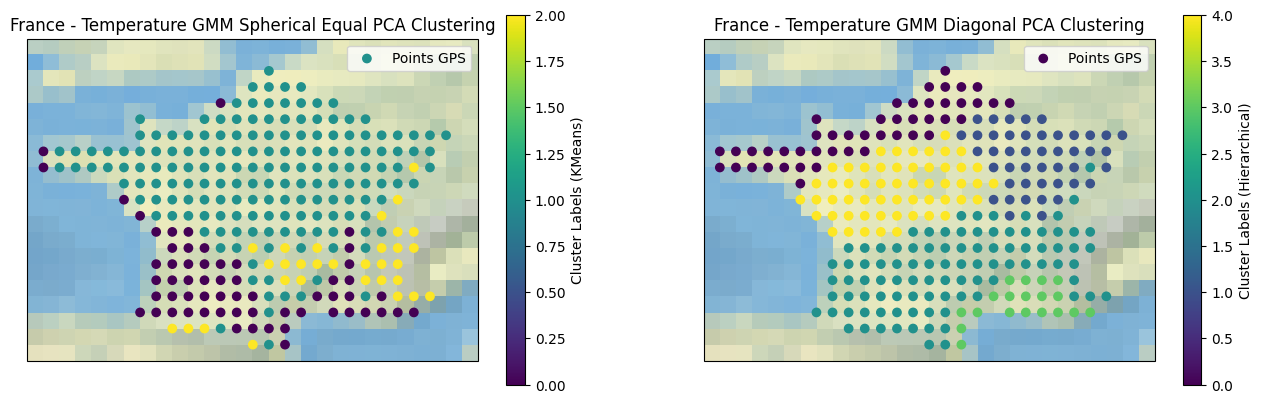

In [18]:
projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(16, 8))

# Plot for KMeans clustering
ax1 = fig.add_subplot(1, 2, 1, projection=projection)
ax1.set_extent([-5, 9, 42, 52])
ax1.set_title("France - Temperature GMM Spherical Equal PCA Clustering")
ax1.stock_img()
scatter1 = ax1.scatter(gps.iloc[:, 0], gps.iloc[:, 1], c=gmm_labels_spherical_equal, cmap='viridis', label='Points GPS')
ax1.legend()
cbar1 = plt.colorbar(scatter1, ax=ax1, shrink=0.6)
cbar1.set_label('Cluster Labels (KMeans)')

# Plot for Hierarchical clustering
ax2 = fig.add_subplot(1, 2, 2, projection=projection)
ax2.set_extent([-5, 9, 42, 52])
ax2.set_title("France - Temperature GMM Diagonal PCA Clustering")
ax2.stock_img()
scatter2 = ax2.scatter(gps.iloc[:, 0], gps.iloc[:, 1], c=gmm_labels_diagonal, cmap='viridis', label='Points GPS')
ax2.legend()
cbar2 = plt.colorbar(scatter2, ax=ax2, shrink=0.6)
cbar2.set_label('Cluster Labels (Hierarchical)')

plt.show()

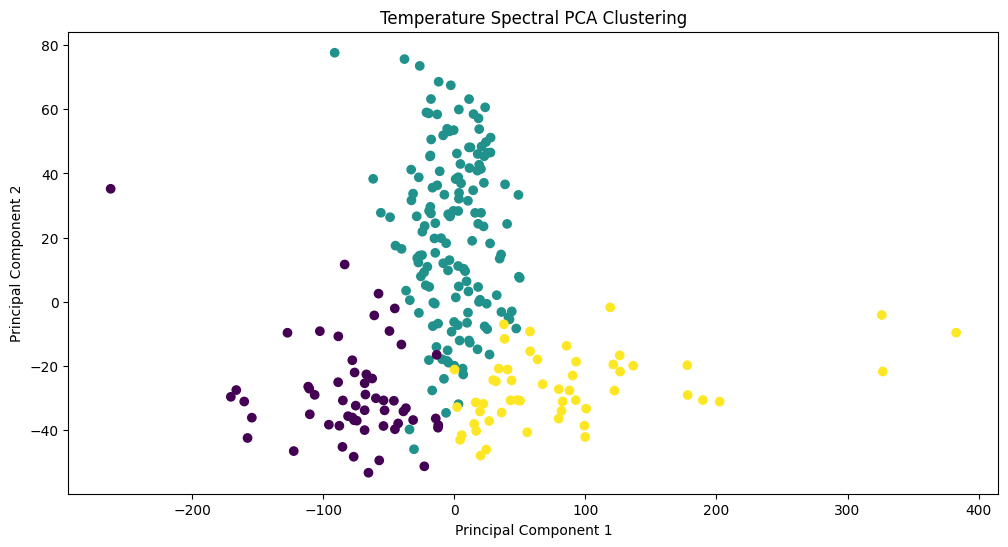

In [36]:
# Spectral Clustering
spect = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
spectral_labels = spect.fit_predict(temp_pca1)

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(temp_pca1[:, 0], temp_pca1[:, 1], c=spectral_labels, cmap='viridis')
plt.title('Temperature Spectral PCA Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

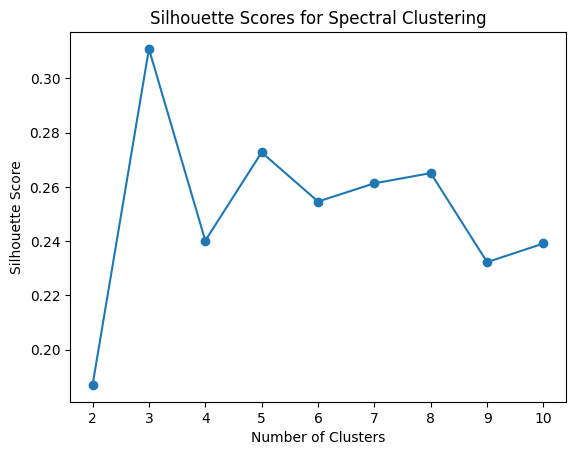

In [35]:
# Assuming temp_pca1 contains the 10 principal components
silhouette_scores = []
for n_clusters in range(2, 11):
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    labels = spectral.fit_predict(temp_pca1)
    silhouette_scores.append(silhouette_score(temp_pca1, labels))

# Plot silhouette scores for different numbers of clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Spectral Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

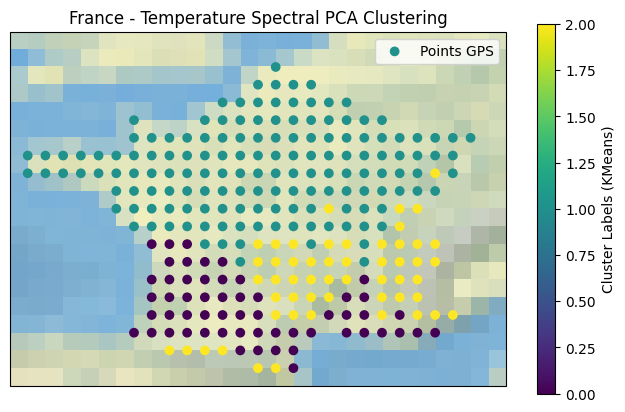

In [37]:
projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 8))

# Plot for KMeans clustering only
ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.set_extent([-5, 9, 42, 52])
ax.set_title("France - Temperature Spectral PCA Clustering")
ax.stock_img()
scatter1 = ax.scatter(gps.iloc[:, 0], gps.iloc[:, 1], c=spectral_labels, cmap='viridis', label='Points GPS')
ax.legend()
cbar1 = plt.colorbar(scatter1, ax=ax, shrink=0.6)
cbar1.set_label('Cluster Labels (KMeans)')

plt.show()

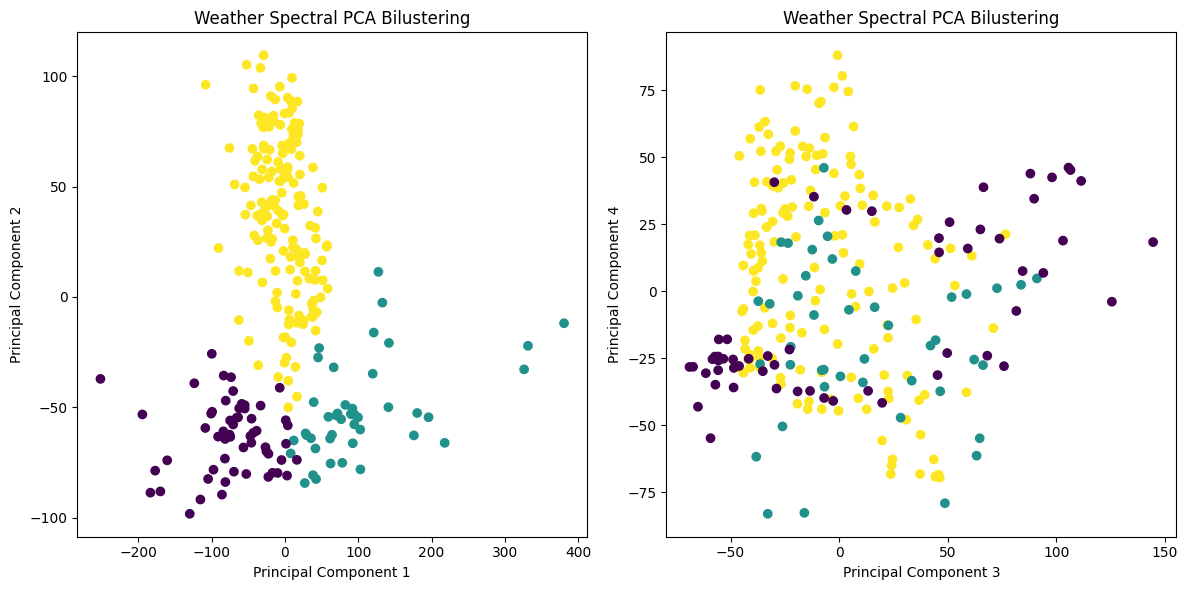

In [49]:
# Combine wind and temperature data
data_combined = np.concatenate((wind, temp), axis=1)

# Standardize the combined data
data_standardized = StandardScaler().fit_transform(data_combined)

# Apply PCA to reduce dimensionality
pca4 = PCA(n_components=10)
data_pca = pca4.fit_transform(data_standardized)

# Spectral Biclustering
n_clusters_row = 3  # Number of row clusters
n_clusters_col = 2  # Number of column clusters (2 for wind and temperature)
bicluster = SpectralBiclustering(n_clusters=(n_clusters_row, n_clusters_col), random_state=42)
bicluster.fit(data_pca)

# Assuming data_pca contains the principal components
plt.figure(figsize=(12, 6))

# Plot the first two principal components
plt.subplot(1, 2, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=bicluster.row_labels_, cmap='viridis')
plt.title('Weather Spectral PCA Bilustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot the third and fourth principal components
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 2], data_pca[:, 3], c=bicluster.row_labels_, cmap='viridis')
plt.title('Weather Spectral PCA Bilustering')
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')

plt.tight_layout()
plt.show()